<a href="https://colab.research.google.com/github/ShedovaNastya/BVT2203_project_workshop/blob/main/researches/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D1%8C_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Нейросеть имеет следующие характеристики
- Датасет: MNIST
- Размер train выборки: 60000
- Размер test выборки: 10000
- Количество скрытых слоев: 3
- Количество нейронов в скрытых слоях: 250
- Функция активации: Сигмоида
- Функция потерь: Кросс Энтропия
- Размер батча = 2000
- Количество эпох: 200
- optimizer = RMSprop lr = 0.001


In [32]:
import numpy as np
import torch
import torchvision.datasets
from tqdm import tqdm_notebook as tqdm

MNIST_train = torchvision.datasets.MNIST('./', download = True, train = True)
MNIST_test = torchvision.datasets.MNIST('./', download = True, train = False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

X_train = MNIST_train.data
X_test = MNIST_test.data
y_train = MNIST_train.targets.to(device)
y_test = MNIST_test.targets.to(device)

X_train = X_train.float().reshape([-1, 28*28]).to(device)
X_test = X_test.float().reshape([-1, 28*28]).to(device)

loss = torch.nn.CrossEntropyLoss()

class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet, self).__init__()
    self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

mnist_net = MNISTNet(250).to(device)

batch_size = 2000

optimizer =  torch.optim.RMSprop(mnist_net.parameters(), lr = 0.001)

acc_train, loss_train = [], []
acc_test, loss_test = [], []


In [33]:
for epoch in tqdm(range(200), desc = 'процесс обучения'):

      order = np.random.permutation(len(X_train))

      for start_indexes in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_indexes:start_indexes + batch_size]

        X_train_batch = X_train[batch_indexes].to(device)
        y_train_batch = y_train[batch_indexes].to(device)

        preds = mnist_net.forward(X_train_batch)

        loss_value = loss(preds, y_train_batch)
        loss_value.backward()

        optimizer.step()

      train_preds = mnist_net.forward(X_train)
      test_preds = mnist_net.forward(X_test)


      acc_train.append((train_preds.argmax(dim = 1) == y_train).float().mean().cpu().data)
      loss_train.append(loss(train_preds, y_train).item())

      acc_test.append((test_preds.argmax(dim = 1) == y_test).float().mean().cpu().data)
      loss_test.append(loss(test_preds, y_test).item())


<ipython-input-33-fa872b8ae03e>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(200), desc = 'процесс обучения'):


процесс обучения:   0%|          | 0/200 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Точность модели = 0.9745999574661255train and test accuracy')

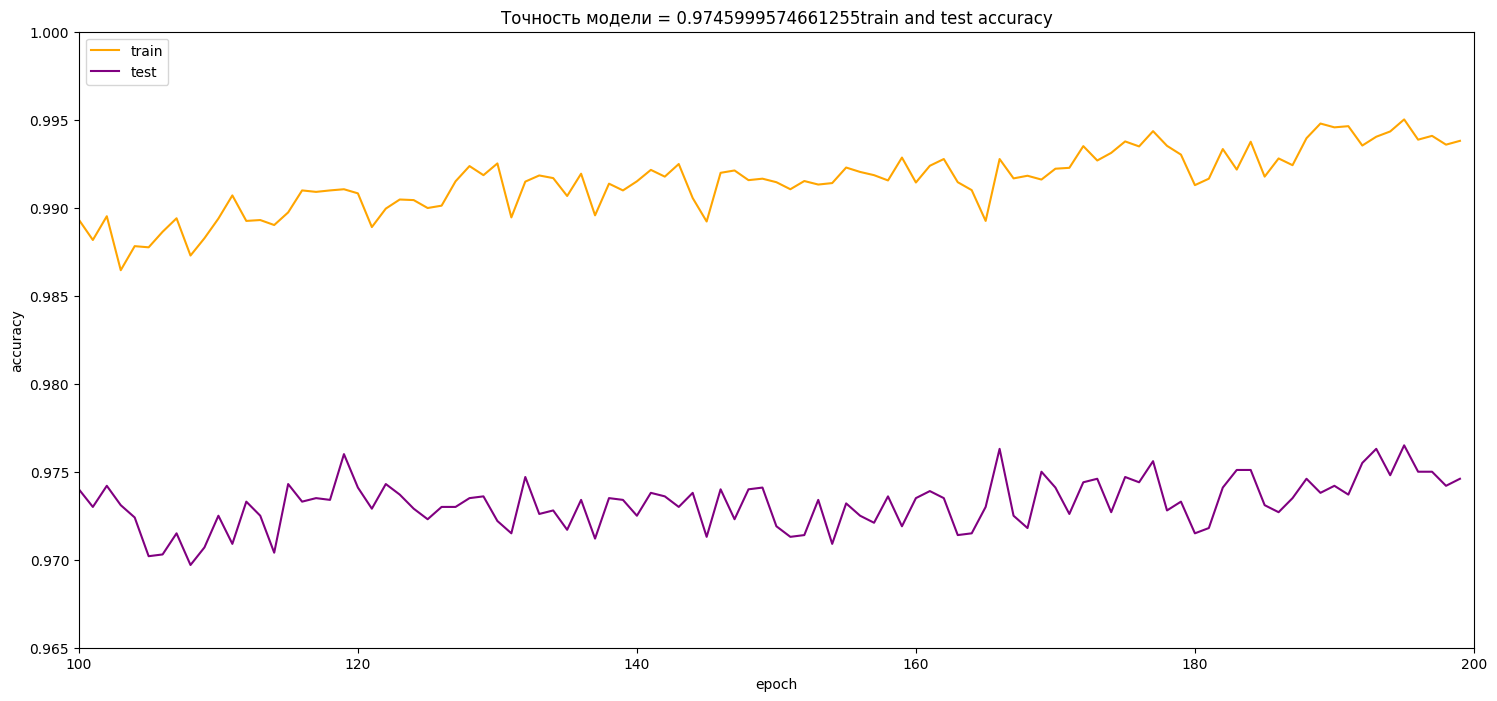

In [37]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 8.0)
plt.plot(range(200), acc_train, c = 'orange', label = 'train')
plt.plot(range(200) , acc_test, c = 'purple', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xlim(100,200)
plt.ylim(0.965, 1.0)
plt.legend(loc = 'upper left')
plt.title(f'Точность модели = {acc_test[-1]}train and test accuracy'.format(acc_test))


Text(0.5, 1.0, ' loss of train and test')

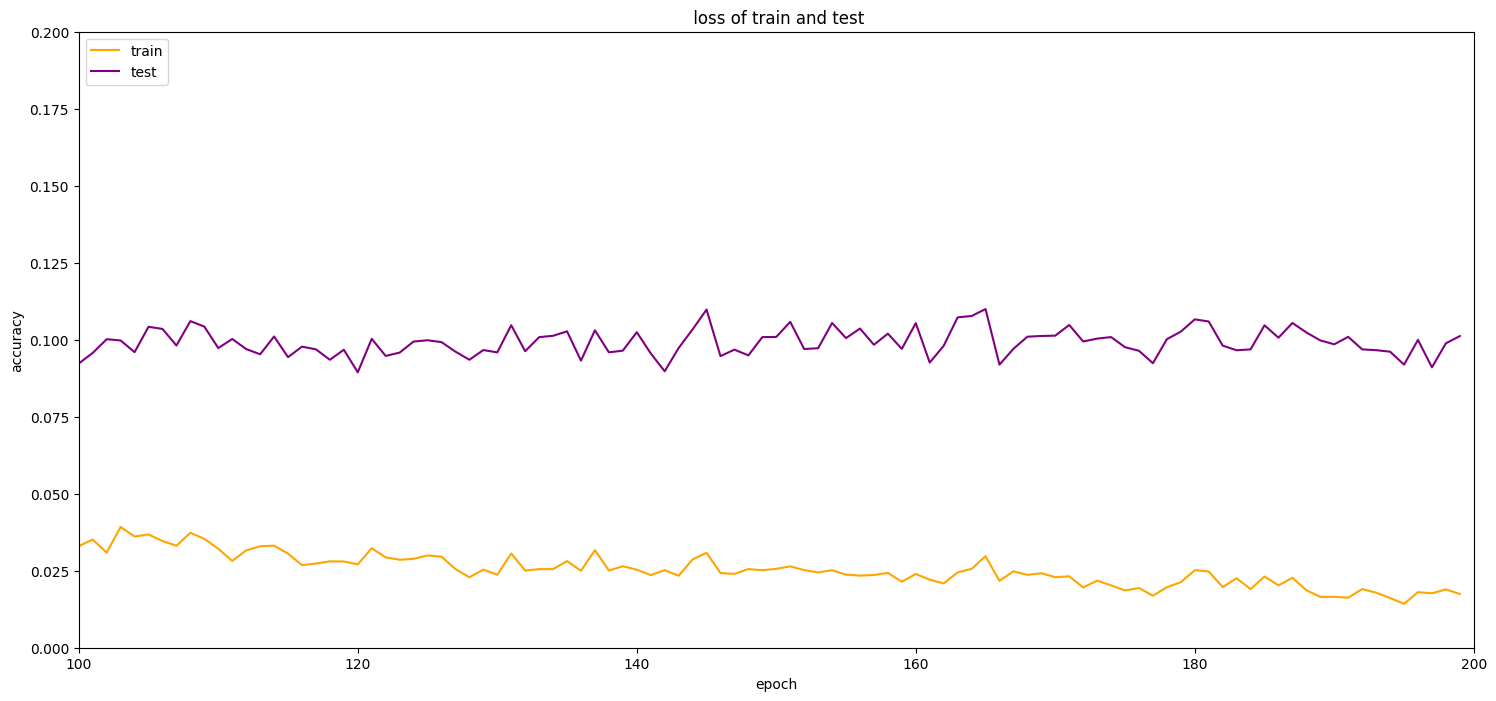

In [35]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 8.0)
plt.plot(range(200), loss_train, c = 'orange', label = 'train')
plt.plot(range(200) , loss_test, c = 'purple', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'upper left')
plt.xlim(100, 200)
plt.ylim(0, 0.2)
plt.title(' loss of train and test')

In [36]:
print('Точность модели при 100 эпохах =', acc_test[99])
print('Точность модели при 200 эпохах =', acc_test[199])

Точность модели при 100 эпохах = tensor(0.9745)
Точность модели при 200 эпохах = tensor(0.9746)
